<h1>Big Data & Data Analytics Project on Job Change Prediction using Python</h1>
<p>By Prachi Goel(035041), Prachi Dua(035040), Aakriti Pathania(035001), </p>
<h2>Introduction</h2>
<p>In this project we tried to explore and visualize the job change prediction dataset using python to test and train our machine leanring model.</p>
<h2>Objectives of the Project:</h2>
<p>1. Exploration & Visualizion the data <br>2. To examine if data has any structure<br>3. To do the Feature Engineering of data<br>4. To create the Data Pipelining<br>5. Perform the Hyperparameter tuning</p>
<h2>About Dataset</h2>
<p>An Ed-Tech company wants to hire data scientists among people who have successfully passed some courses and then signed up for training. The company wants to know which of the people are looking for a job change and will prefer working with them after completion of training because it helps to reduce the cost and time for categorization of candidates.

Information related to demographics, education, the experience is in hands from candidates sign up and enrollment.</p>


# This dataset is composed by the following variables:

**enrollee_id:** Unique ID for the candidate

**city:** City code

**city_ development _index:** Development index of the city (scaled)

**gender:** Gender of the candidate

**relevent_experience:** Relevant experience of the candidate

**enrolled_university:** Type of University course enrolled if any

**education_level:** Education level of candidate

**major_discipline:** Education major discipline of the candidate

**experience:** Candidate total experience in years

**company_size:** No of employees in current employer's company

**company_type:** Type of current employer

**lastnewjob:** Difference in years between previous job and current job

**training_hours:** training hours completed

**target:** 0 – Not looking for a job change, 1 – Looking for a job change

# Notebook outline:

1. Data Analysis and Visualization
    - Dataset Information
    - Visualizations
2. Data Preprocessing
    - Data Encoding
3. Models Training and Evaluation
    - Splitting data into train and test set
    - Training Base Models
    - Evaluation of Base Models
    - Hyperparameter Tuning
    - Evaluation of Tuned Models

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
# 0.0
# For skopt routines
! pip install scikit-optimize

# 0.1 For plotting skopt results
! pip install 'scikit-optimize[plots]'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

     -------------------------------------- 100.3/100.3 kB 5.6 MB/s eta 0:00:00


ERROR: Invalid requirement: "'scikit-optimize[plots]'"


In [47]:
# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [50]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns


# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

SEED = 0

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Some basic libraries ...

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("C:\\Users\\user\\Downloads\\archive\\aug_train.csv")
test = pd.read_csv("C:\\Users\\user\\Downloads\\archive\\aug_test.csv")

# 1. Data Analysis and Visualization

In [58]:
print('Job prediction dataset shape:  ', data.shape)
data.head()


Job prediction dataset shape:   (19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [52]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## Dataset Variable information:

+ enrollee_id : Unique ID for enrollee
+ city: City code
+ citydevelopmentindex: Developement index of the city (scaled)
+ gender: Gender of enrolee
+ relevent_experience: Relevent experience of enrolee
+ enrolled_university: Type of University course enrolled if any
+ education_level: Education level of enrolee
+ major_discipline :Education major discipline of enrolee
+ experience: Enrolee total experience in years
+ company_size: No of employees in current employer's company
+ company_type : Type of current employer
+ lastnewjob: Difference in years between previous job and current job
+ training_hours: training hours completed
+ target: 0 – Not looking for job change, 1 – Looking for a job change

checking the type of the data types

In [53]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [33]:
data.describe(include = 'object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


**But, "Categorical variables"**

We need to deal with categorical variables so columns which have values different than numbers. 

A simple way of selecting all categorical columns is by checking their type.

Thus, In the database, only 4 columns are of numerical-data, and up to 10 columns are Categorical variables type.

#### Finding the missing values

In [10]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [55]:
for column in ['gender','enrolled_university','education_level','major_discipline', 'experience', 'company_size', 'company_type','last_new_job']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [56]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [77]:
columns_to_drop = ['gender', 'major_discipline']
df=data.drop(columns=columns_to_drop)
df


,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,No relevent experience,no_enrollment,Graduate,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,50-99,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,50-99,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,500-999,Pvt Ltd,2,97,0.0


In [78]:
total_lines = 19158
num_lines = 0.4 * total_lines    # 40% of data

p = num_lines/total_lines  # fraction of lines to read (40%)

In [82]:
import numpy as np

# Define the fraction of data to sample
fraction_to_sample = 0.4

# Calculate the number of rows to sample
num_rows_to_sample = int(len(df) * fraction_to_sample)

# Use numpy to randomly sample rows
sampled_data = df.sample(n=num_rows_to_sample, random_state=40)  # Set random_state for reproducibility

# Now 'sampled_data' contains 40% of the rows from 'merged_data'
sampled_data.shape

(7663, 12)

In [83]:
df_2 = sampled_data.copy()

In [88]:
imputed_columns = df_2.columns

In [90]:
# Handle missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_fit = imputer.fit_transform(df_2)
merged_data_si = pd.DataFrame(imputer_fit, columns=imputed_columns); merged_data_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
merged_data_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             7663 non-null   object
 1   city                    7663 non-null   object
 2   city_development_index  7663 non-null   object
 3   relevent_experience     7663 non-null   object
 4   enrolled_university     7663 non-null   object
 5   education_level         7663 non-null   object
 6   experience              7663 non-null   object
 7   company_size            7663 non-null   object
 8   company_type            7663 non-null   object
 9   last_new_job            7663 non-null   object
 10  training_hours          7663 non-null   object
 11  target                  7663 non-null   object
dtypes: object(12)
memory usage: 718.5+ KB


In [91]:
merged_data_si.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [92]:
df1=merged_data_si.copy()

#### Dividing the data into test and train data

In [94]:
X = df1.drop(["city_development_index", "experience", "training_hours", "target"], axis=1)
y = df1[["city_development_index", "experience", "training_hours", "target"]]

In [95]:
# Dividing data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [96]:
X.isna().sum()
y.isna().sum()

city_development_index    0
experience                0
training_hours            0
target                    0
dtype: int64

#### Creating Pipeline


In [97]:
steps_rr = [
    ('scaler', StandardScaler()),            # Step 1: StandardScaler
    ('regressor', RandomForestRegressor())  # Step 2: RandomForestRegressor
]

In [98]:
pipe_rr = Pipeline(steps_rr)

In [99]:
pipe_rr.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor', RandomForestRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__bootstrap': True,
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'squared_error',
 'regressor__max_depth': None,
 'regressor__max_features': 'auto',
 'regressor__max_leaf_nodes': None,
 'regressor__max_samples': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__n_estimators': 100,
 'regressor__n_jobs': None,
 'regressor__oob_score': False,
 'regressor__random_state': None,
 'regressor__verbose': 0,
 'regressor__warm_start': False}

In [100]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,4]
}

clf = GridSearchCV(estimator=RandomForestRegressor(random_state=40),
                           param_grid=parameters,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)


In [102]:
# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

In [103]:
# 7.2. Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60  



--Takes time...---

Fitting 5 folds for each of 36 candidates, totalling 180 fits


ValueError: could not convert string to float: 'city_21'

In [38]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,PolynomialFeatures,PowerTransformer,OneHotEncoder


In [41]:
x = df.drop(columns='target')
y = df['target']

In [42]:
import numpy as np

# Define the fraction of data to sample
fraction_to_sample = 0.4

# Calculate the number of rows to sample
num_rows_to_sample = int(len(merged_data_1) * fraction_to_sample)

# Use numpy to randomly sample rows
sampled_data = merged_data_1.sample(n=num_rows_to_sample, random_state=42)  # Set random_state for reproducibility

# Now 'sampled_data' contains 40% of the rows from 'merged_data'
sampled_data.shape

## Visualizations

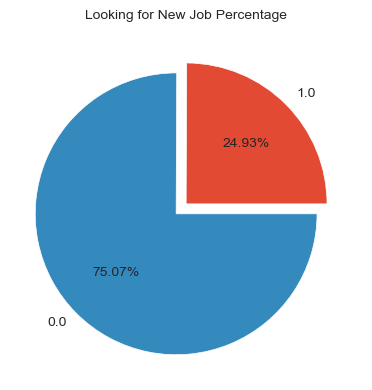

In [32]:
# 14000 people are not looking for a job change and on the other hand approximately 5000 people are willing to change their jobs.
#Churn vs. normal 
sizes = list(data['target'].value_counts().sort_values().values)
labels = list(data['target'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=10)
plt.tight_layout()
plt.show()

Next, let's look at the frequency of each category separated the histogram charts to check if there is any special information to distinguish whether the result of the "target" is 0 - Not looking for job change, OR, 1 - Looking for a job change.

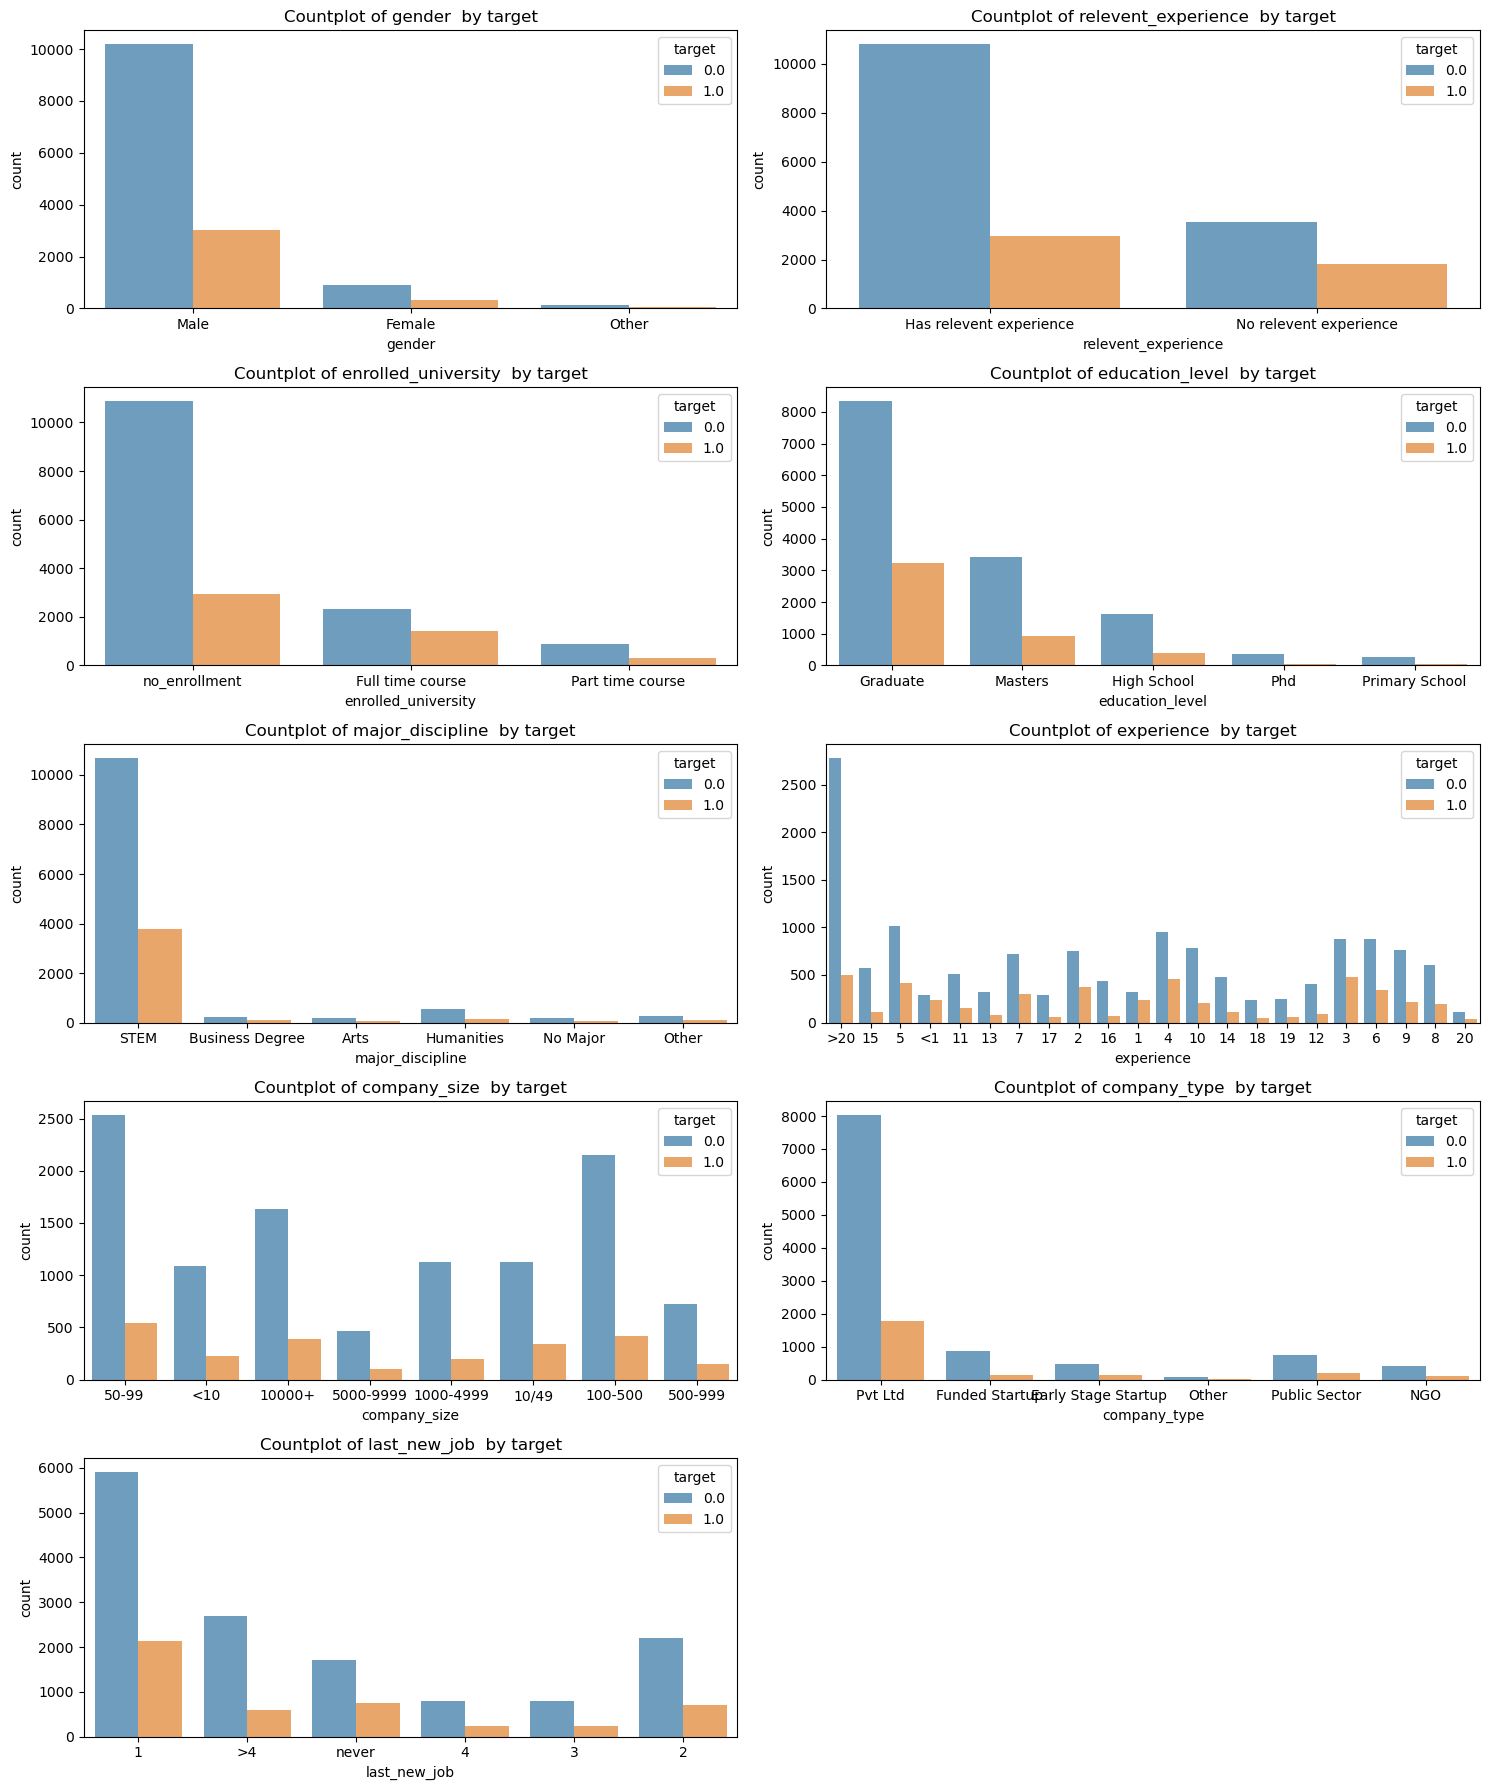

In [12]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

From these histogram charts, it can be seen, there is no special correlation between the variables with the target function to distinguish the value of the target. Furthermore, categorical variables cannot determine the correlation factor between these variables and the target function.

In [13]:
np.array(data.columns[data.dtypes != object])

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)